- Count the number of comments under each category
- Number of tags per comment
-------------------------------------------------
- Correlation between categories (???)
-------------------------------------------------
- Count number of words per comment
- Count number of characters per comment
- Count number of sentences per comment
- Average number of words per sentence
- Average number of characters per word and sentence
- Correlation between all these parameters and number of tags (???)
---------------------------------------------------
- Word Cloud and most common words for clean and toxic comments
---------------------------------------------------
- Text preprocessing: 
    - lower case
    - remove stop words
    - remove numbers and special characters
    - lemmatization
---------------------------------------------------
- Word Cloud and most common words for clean and toxic comments using clean text
---------------------------------------------------
- Text vectorization
    - Bag of Words and CountVectorizer
    - TF-IDF

# Text Pocessing and EDA

The objective of this notebook is to explore the corpus, clea the text and perform the EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
import nltk
import seaborn as sns
import re
import textblob
import spacy
from nltk.tokenize.toktok import ToktokTokenizer

%matplotlib inline

In [2]:
# Read data
train = pd.read_csv('Library/train_df.csv')
test = pd.read_csv('Library/test_df.csv')

## Exploratory Data Analysis

### Train dataset

I start with the EDA of the train dataset. Afterwards, I will perform the same steps on the test dataset.

####         - Specify the number of comments under each category

First, let's figure out the number of rows under each category of toxicity.

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df1 = train.iloc[:, 2:].sum(axis=1)
total_comments = len(df1)
clean_comments = len(df1[df1==0])
tagged_comments = len(df1[df1!=0])

print('Total comments:{}'.format(total_comments))
print('Clean comments:{}'.format(clean_comments))
print('Tagged comments:{}'.format(tagged_comments))

Total comments:159571
Clean comments:143346
Tagged comments:16225


In [5]:
df1 = train[train.columns[2:]].melt()
df1 = df1[df1.value == 1]
df1.head()

,variable,value
6,toxic,1
12,toxic,1
16,toxic,1
42,toxic,1
43,toxic,1


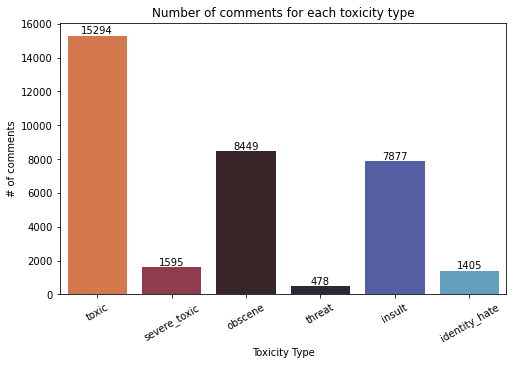

In [6]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='variable', data=df1, palette='icefire_r')
ax.set(xlabel='Toxicity Type')
ax.set(ylabel='# of comments')
ax.tick_params(axis='x', rotation=30)
ax.set(title='Number of comments for each toxicity type')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

The toxicity is not evenly spread out across classes. Therefore, we may face class imbalance problem.
There are 16225 tagged comments in total. While, toxic category only consists of 15294 comments. Obscene and insult categories consist of more than 16000 comments together. Therefore, a comment can be classified as several types.

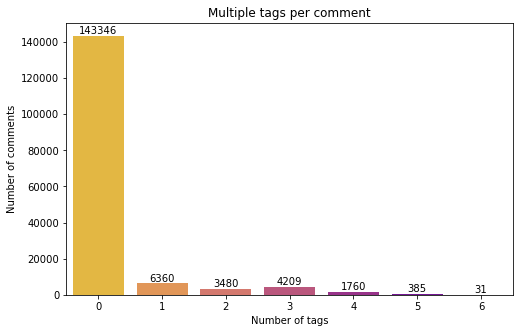

In [7]:
df1 = pd.DataFrame(train.iloc[:, 2:].sum(axis=1))
df1.columns = ['sum']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='sum', data=df1, palette='plasma_r')
ax.set(xlabel='Number of tags')
ax.set(ylabel='Number of comments')
ax.set(title='Multiple tags per comment')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

#### Correlation between categories

In [8]:
df = train.iloc[:,2:-1]
corr = df.corr()
corr

,toxic,severe_toxic,obscene,threat,insult
toxic,1.000000,0.308619,0.676515,0.157058,0.647518
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807
obscene,0.676515,0.403014,1.000000,0.141179,0.741272
threat,0.157058,0.123601,0.141179,1.000000,0.150022
insult,0.647518,0.375807,0.741272,0.150022,1.000000


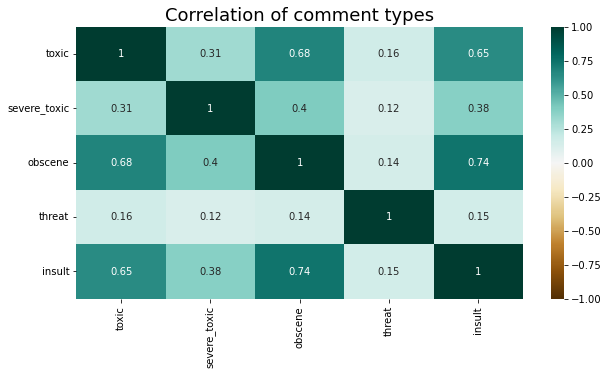

In [9]:
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.tick_params(axis='y', rotation=0)
heatmap.tick_params(axis='x', rotation=90)
heatmap.set_title('Correlation of comment types', fontdict={'fontsize':18})
plt.show()

The highest correlation is between obscene and insult.

### Word and character count

In [10]:
train.head()

wc_df = train
wc_df['word_count'] = wc_df['comment_text'].apply(lambda x: len(nltk.word_tokenize(x)))
wc_df['char_count'] = wc_df['comment_text'].apply(lambda x: len(x.replace(' ', '')))
wc_df['sent_count'] = wc_df['comment_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
wc_df['avg_char_word'] = wc_df['char_count'] / wc_df['word_count']
wc_df['avg_char_sent'] = wc_df['char_count'] / wc_df['sent_count']
wc_df['avg_word_sent'] = wc_df['word_count'] / wc_df['sent_count']
wc_df['num_tags'] = wc_df.iloc[:, 2:8].sum(axis=1) 
wc_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,char_count,sent_count,avg_char_word,avg_char_sent,avg_word_sent,num_tags
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,49,223,3,4.551020,74.333333,16.333333,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,27,95,4,3.518519,23.750000,6.750000,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,48,192,3,4.000000,64.000000,16.000000,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,128,511,4,3.992188,127.750000,32.000000,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,18,55,2,3.055556,27.500000,9.000000,0


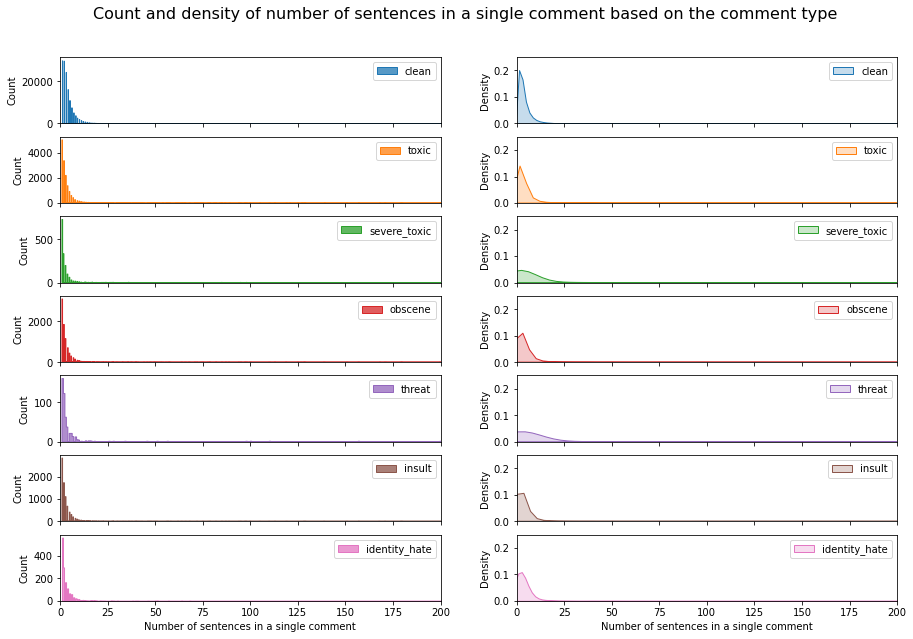

In [11]:
title = 'Count and density of number of sentences in a single comment based on the comment type'

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,10), sharex=True)
fig.suptitle(title, fontsize=16, y=0.95)
colors = sns.color_palette("tab10", 7)

sns.histplot(data=wc_df[wc_df['num_tags']==0], x='sent_count', color=colors[0], 
             label='clean', element='step', ax=ax[0,0])

sns.kdeplot(data=wc_df[wc_df['num_tags']==0]['sent_count'], color=colors[0], 
            ax=ax[0,1], label='clean', shade=True)

ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 0].set_xlim(0,200)
ax[0, 1].set_ylim(0,0.25)

row_count = 1

for col in wc_df.columns[2:8]:
    
    sns.histplot(data=wc_df[wc_df[col]==1], x='sent_count', color=colors[row_count], 
             label=col, element='step', ax=ax[row_count,0])
    
    sns.kdeplot(data=wc_df[wc_df[col]==1]['sent_count'], color=colors[row_count], 
                 ax=ax[row_count,1], label=col, shade=True)
    
    ax[row_count, 0].legend()
    ax[row_count, 1].legend()
    ax[row_count, 0].set_xlim(0,200)
    ax[row_count, 1].set_ylim(0,0.25)
    ax[row_count, 0].set_xlabel('Number of sentences in a single comment')
    ax[row_count, 1].set_xlabel('Number of sentences in a single comment')
    
    row_count += 1

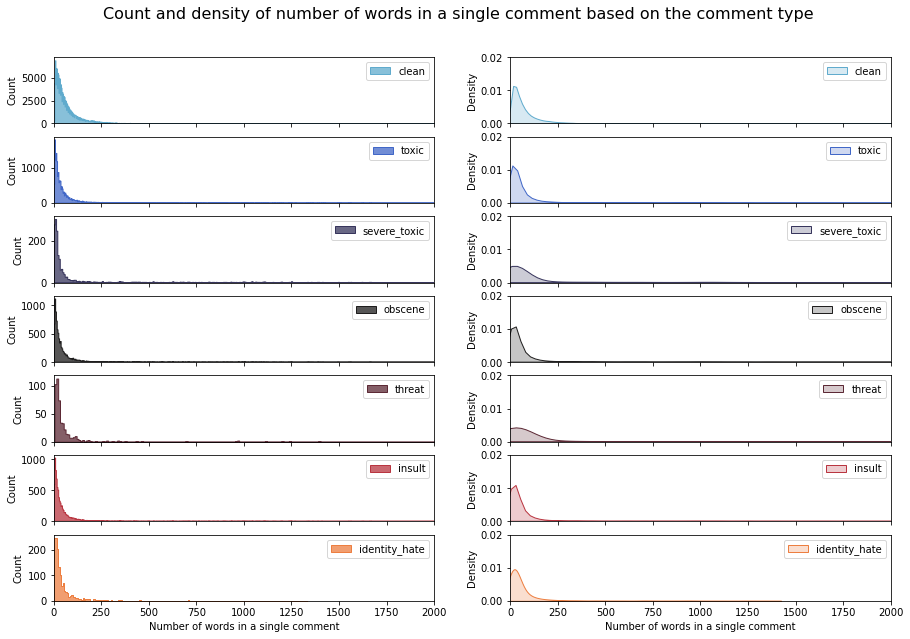

In [12]:
title = 'Count and density of number of words in a single comment based on the comment type'
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,10), sharex=True)
fig.suptitle(title, fontsize=16, y=0.95)
colors = sns.color_palette("icefire", 7)

sns.histplot(data=wc_df[wc_df['num_tags']==0], x='word_count', color=colors[0], 
             label='clean', element='step', ax=ax[0,0])

sns.kdeplot(data=wc_df[wc_df['num_tags']==0]['word_count'], color=colors[0], 
            ax=ax[0,1], label='clean', shade=True)

ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 0].set_xlim(0,2000)
ax[0, 1].set_ylim(0,0.02)

row_count = 1

for col in wc_df.columns[2:8]:
    
    sns.histplot(data=wc_df[wc_df[col]==1], x='word_count', color=colors[row_count], 
             label=col, element='step', ax=ax[row_count,0])
    
    sns.kdeplot(data=wc_df[wc_df[col]==1]['word_count'], color=colors[row_count], 
                 ax=ax[row_count,1], label=col, shade=True)
    
    ax[row_count, 0].legend()
    ax[row_count, 1].legend()
    ax[row_count, 0].set_xlim(0,2000)
    ax[row_count, 1].set_ylim(0,0.02)
    ax[row_count, 0].set_xlabel('Number of words in a single comment')
    ax[row_count, 1].set_xlabel('Number of words in a single comment')
    
    row_count += 1   

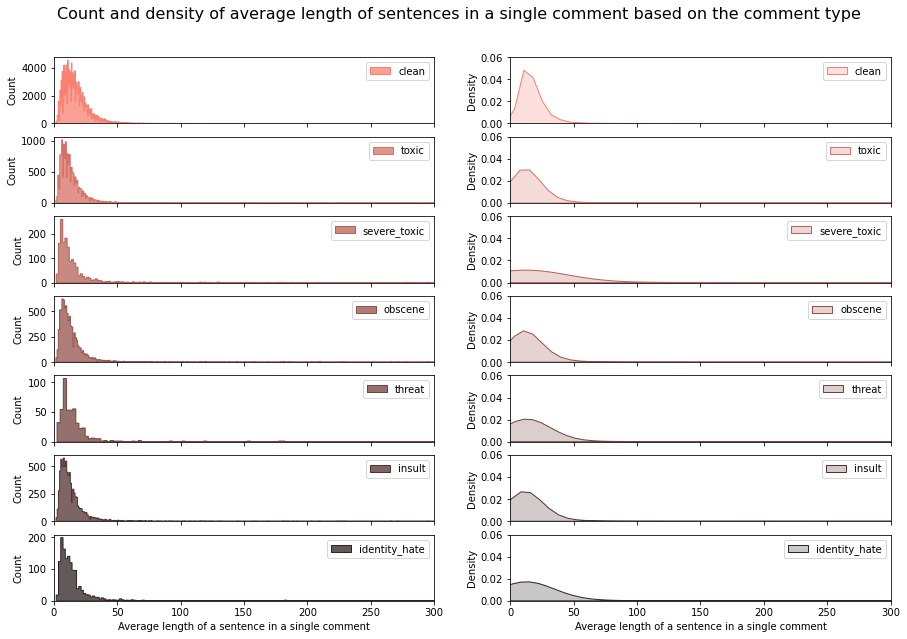

In [13]:
title = 'Count and density of average length of sentences in a single comment based on the comment type'

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,10), sharex=True)
fig.suptitle(title, fontsize=16, y=0.95)
colors = sns.color_palette("dark:salmon_r", 7)

sns.histplot(data=wc_df[wc_df['num_tags']==0], x='avg_word_sent', color=colors[0], 
             label='clean', element='step', ax=ax[0,0])

sns.kdeplot(data=wc_df[wc_df['num_tags']==0]['avg_word_sent'], color=colors[0], 
            ax=ax[0,1], label='clean', shade=True)

ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 0].set_xlim(0,300)
ax[0, 1].set_ylim(0,0.06)

row_count = 1

for col in wc_df.columns[2:8]:
    
    sns.histplot(data=wc_df[wc_df[col]==1], x='avg_word_sent', color=colors[row_count], 
             label=col, element='step', ax=ax[row_count,0])
    
    sns.kdeplot(data=wc_df[wc_df[col]==1]['avg_word_sent'], color=colors[row_count], 
                 ax=ax[row_count,1], label=col, shade=True)
    
    ax[row_count, 0].legend()
    ax[row_count, 1].legend()
    ax[row_count, 0].set_xlim(0,300)
    ax[row_count, 1].set_ylim(0,0.06)
    ax[row_count, 0].set_xlabel('Average length of a sentence in a single comment')
    ax[row_count, 1].set_xlabel('Average length of a sentence in a single comment')
    
    row_count += 1

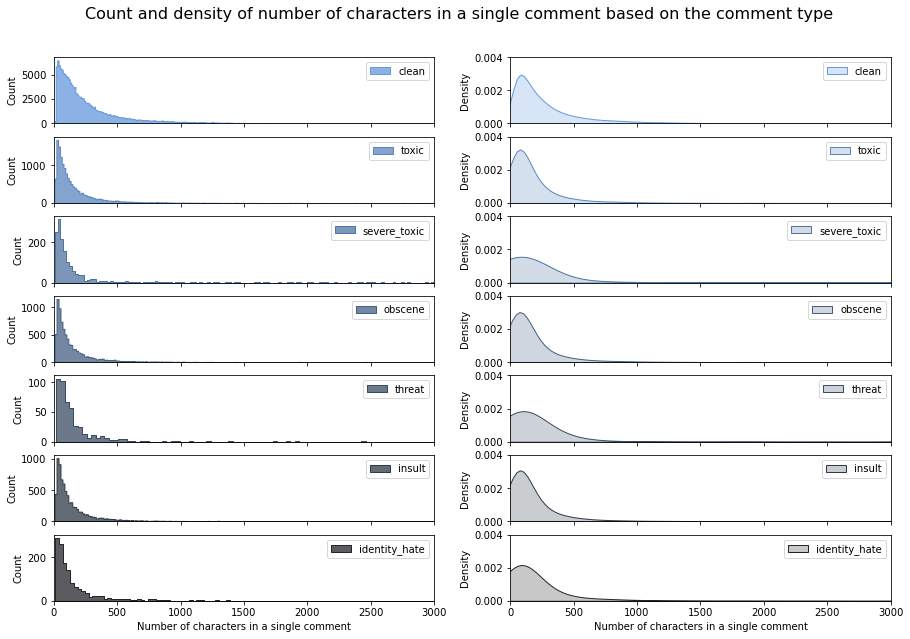

In [14]:
title = 'Count and density of number of characters in a single comment based on the comment type'

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,10), sharex=True)
fig.suptitle(title, fontsize=16, y=0.95)
colors = sns.dark_palette("#69d", 7, reverse=True)

sns.histplot(data=wc_df[wc_df['num_tags']==0], x='char_count', color=colors[0], 
             label='clean', element='step', ax=ax[0,0])

sns.kdeplot(data=wc_df[wc_df['num_tags']==0]['char_count'], color=colors[0], 
            ax=ax[0,1], label='clean', shade=True)

ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 0].set_xlim(0,3000)
ax[0, 1].set_ylim(0,0.004)

row_count = 1

for col in wc_df.columns[2:8]:
    
    sns.histplot(data=wc_df[wc_df[col]==1], x='char_count', color=colors[row_count], 
             label=col, element='step', ax=ax[row_count,0])
    
    sns.kdeplot(data=wc_df[wc_df[col]==1]['char_count'], color=colors[row_count], 
                 ax=ax[row_count,1], label=col, shade=True)
    
    ax[row_count, 0].legend()
    ax[row_count, 1].legend()
    ax[row_count, 0].set_xlim(0,3000)
    ax[row_count, 1].set_ylim(0,0.004)
    ax[row_count, 0].set_xlabel('Number of characters in a single comment')
    ax[row_count, 1].set_xlabel('Number of characters in a single comment')
    
    row_count += 1

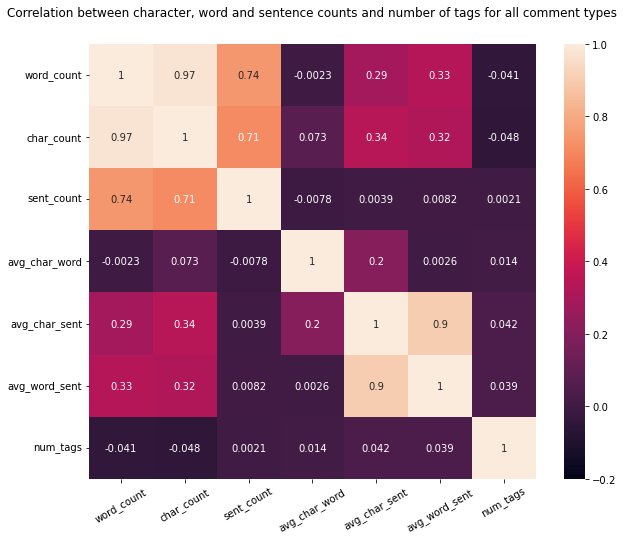

In [15]:
corr = wc_df.iloc[:, -7:].corr()
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr, vmin=-0.2, vmax=1, annot=True)
heatmap.tick_params(axis='y', rotation=0)
heatmap.tick_params(axis='x', rotation=30)
heatmap.set_title('Correlation between character, word and sentence counts and number of tags for all comment types'
                  , y =1.05)
plt.show()

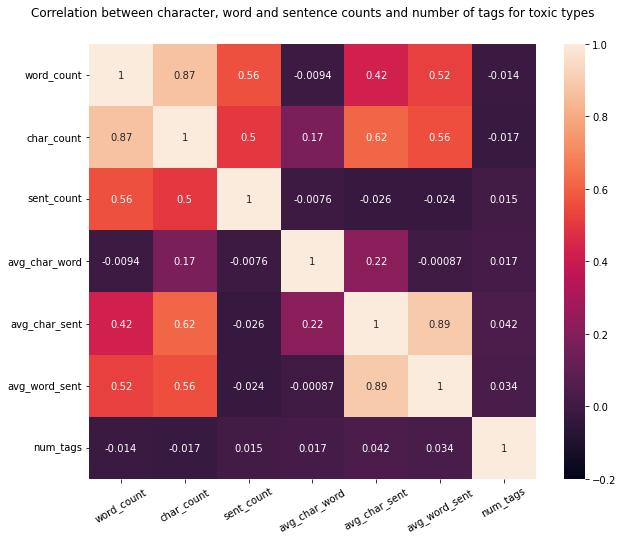

In [16]:
corr = wc_df[wc_df['num_tags']!=0].iloc[:, -7:].corr()
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr, vmin=-0.2, vmax=1, annot=True)
heatmap.tick_params(axis='y', rotation=0)
heatmap.tick_params(axis='x', rotation=30)
heatmap.set_title('Correlation between character, word and sentence counts and number of tags for toxic types'
                  , y =1.05)
plt.show()

#### - Word Cloud

Now, I visualize the the text information for each category. A nice way to visualize the text information is using a word cloud.

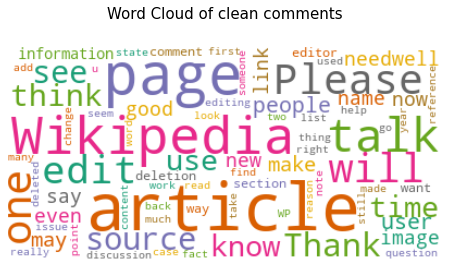

In [17]:
wc = WordCloud(max_font_size=60, min_font_size=10, max_words=100, background_color='white', 
               colormap='Dark2',  collocations=False)
fig = plt.figure(figsize=(8, 4))
text = ' '.join(wc_df[wc_df.num_tags == 0]['comment_text'])
wordcloud = wc.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of clean comments', fontsize=15, y=1.1)
plt.show()

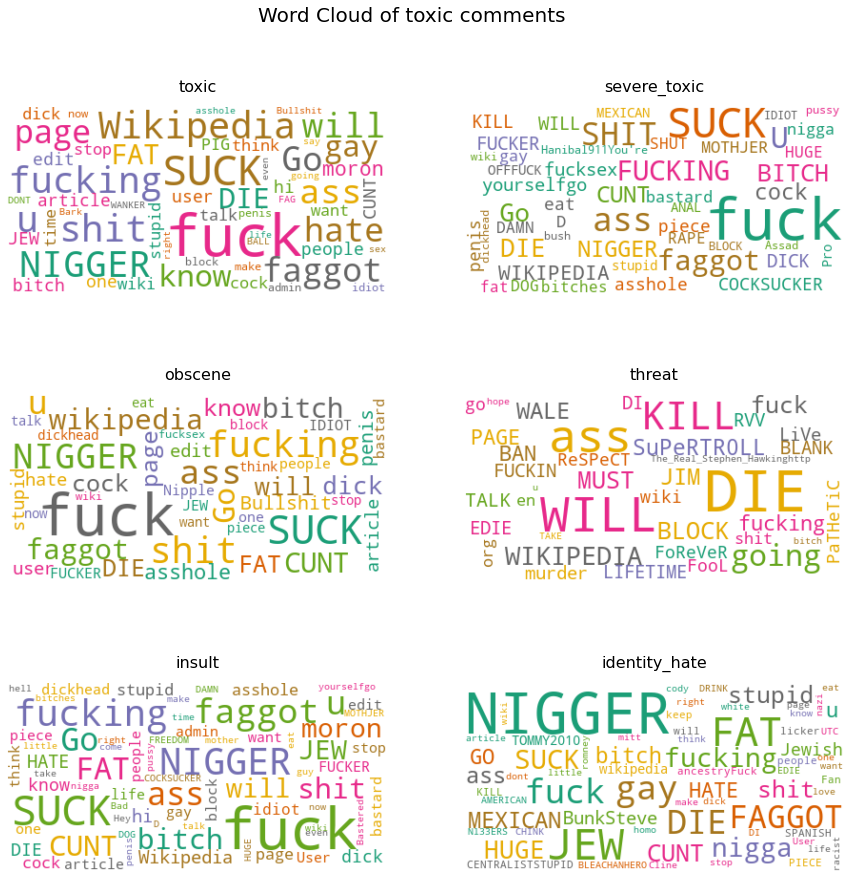

In [18]:
wc = WordCloud(max_font_size=60, min_font_size=10, max_words=100, background_color='white', 
               colormap='Dark2', repeat=False, random_state=10, contour_width=0.1,
            contour_color='black',mode='RGB', collocations=False)

fig = plt.figure(figsize=(15,15))
i = 1
for col in wc_df.columns[2:8]:
    ax = fig.add_subplot(3, 2, i)
    text = ' '.join([t for t in wc_df[wc_df[col] != 0]['comment_text']])
    wordcloud = wc.generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.title(col, fontsize=16, y=1.05)
    plt.suptitle('Word Cloud of toxic comments', fontsize=20, y=0.95)
    i += 1

The wordcloud representation shows that I need to perform text prepocessing. I need to remove unnecessary words, like punctutation, white spaces and stop words. Also, lemmatization (converting a word to its base form) is essential.

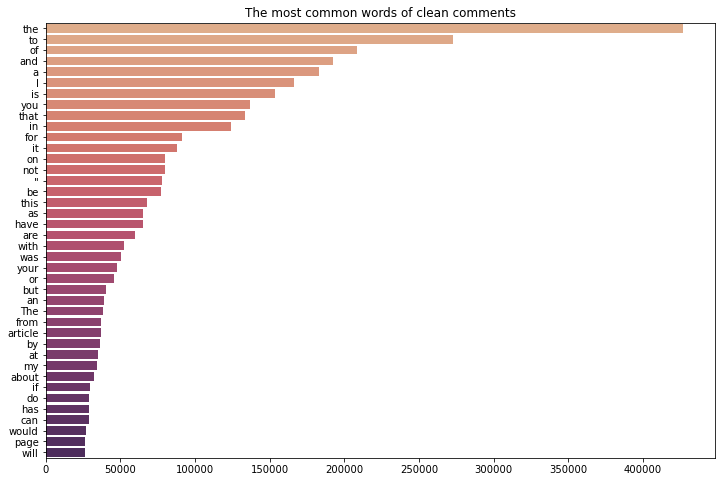

In [19]:
from collections import Counter

text = list(' '.join(wc_df[wc_df.num_tags == 0]['comment_text']).split())
counter = Counter(text)
most_common = counter.most_common()

x, y = [], []
for word, count in most_common[:40]:
    y.append(word)
    x.append(count)
    
plt.figure(figsize=(12,8))
bar = sns.barplot(x=x, y=y, palette='flare')
bar.set_title('The most common words of clean comments')
plt.show()

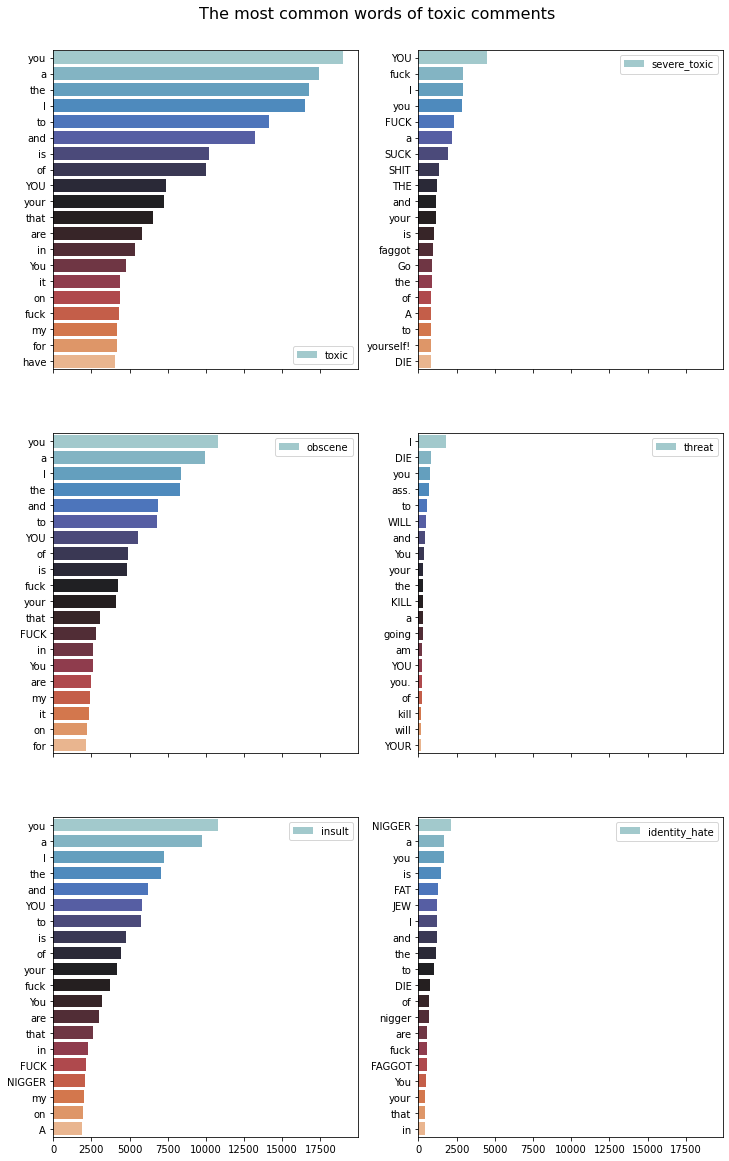

In [20]:
title = 'The most common words of toxic comments'
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,20))
fig.suptitle(title, fontsize=16, y=0.91)
row_num = 0
col_num = 0
i = 0
j = 0

for col in wc_df.columns[2:8]:
    
    text = list(' '.join(wc_df[wc_df[col] != 0]['comment_text']).split())
    counter = Counter(text)
    most_common = counter.most_common()

    x, y = [], []
    for word, count in most_common[:20]:
        y.append(word)
        x.append(count)
        
    sns.barplot(x=x, y=y, ax=ax[row_num, col_num], label=col, palette='icefire')
    ax[row_num, col_num].legend()
    row_num = int((i+1)/2)
    col_num = (j+1)%2
    i += 1
    j += 1

#### - Text Preprocessing

In this section, I define functions to perform text preprocessing and cleaning and test the functions, too.

In [21]:
# Removing special characters

def special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, ' ', text)
    return text

train['comment_text'][:5].apply(special_characters)

0    Explanation\nWhy the edits made under my usern...
1    D aww  He matches this background colour I m s...
2    Hey man  I m really not trying to edit war  It...
3     \nMore\nI can t make any real suggestions on ...
4    You  sir  are my hero  Any chance you remember...
Name: comment_text, dtype: object

In [22]:
# Lemmatization

nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

train['comment_text'][:5].apply(lemmatize_text)


0    Explanation \n why the edit make under my user...
1    D'aww ! he match this background colour I be s...
2    hey man , I be really not try to edit war . it...
3    " \n More \n I can not make any real suggestio...
4    you , sir , be my hero . any chance you rememb...
Name: comment_text, dtype: object

In [23]:
# Remove stop words

stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')

def remove_stopwords(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    text = ' '.join([token for token in tokens if token.lower() not in stopwords])
    return text

remove_stopwords(train['comment_text'][0])

"Explanation edits made username Hardcore Metallica Fan reverted ? ' vandalisms , closure GAs voted New York Dolls FAC. please ' remove template talk page since ' retired now.89.205.38.27"

In [24]:
# Case conversion

def text_conversion(text, case = 'lower'):
    if case == 'lower':
        return text.lower()
    elif case == 'upper':
        return text.upper()
    elif case == 'title':
        return text.title()
    else:
        return text
    
text_conversion(train['comment_text'][0], case='lower')

"explanation\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27"

In [25]:
train_df = wc_df
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,char_count,sent_count,avg_char_word,avg_char_sent,avg_word_sent,num_tags
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,49,223,3,4.551020,74.333333,16.333333,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,27,95,4,3.518519,23.750000,6.750000,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,48,192,3,4.000000,64.000000,16.000000,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,128,511,4,3.992188,127.750000,32.000000,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,18,55,2,3.055556,27.500000,9.000000,0


In [27]:
import time

starttime = time.time()

for i in range(0, len(train), 10000):
    comment_df = train_df[i:i+10000]
    train_df.loc[i:i+10000,['clean_text']] = comment_df['comment_text'].apply(special_characters). \
                apply(lemmatize_text).apply(remove_stopwords).apply(text_conversion)
        
    print(i)
    
    time.sleep(2)
    
print('The text preprocessing took {} seconds'.format(time.time() - starttime))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
The text preprocessing took 2210.595030069351 seconds


In [28]:
pd.set_option('max_colwidth',150)
train_df[['comment_text', 'clean_text']].head(10)

,comment_text,clean_text
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I ...",explanation edit make username hardcore metallica fan revert vandalisms closure gas vote new york dolls fac please remove template talk page since...
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",aww match background colour seemingly stuck thank talk january utc
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits in...",hey man really not try edit war guy constantly remove relevant information talk edit instead talk page seem care formatting actual info
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of...",make real suggestion improvement wonder section statistic later subsection type accident think reference may need tidy exact format ie date format...
4,"You, sir, are my hero. Any chance you remember what page that's on?",sir hero chance remember page
5,"""\n\nCongratulations from me as well, use the tools well. · talk """,congratulation well use tool well talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker pis around work
7,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",vandalism matt shirvington article revert please ban
8,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandal...",sorry word nonsense offensive anyway not intend write anything article wow would jump vandalism merely request encyclopedic one use school referen...
9,alignment on this subject and which are contrary to those of DuLithgow,alignment subject contrary dulithgow


#### - Word Cloud Representation After Text Preprocessing

Word cloud representation based on the word frequency for all groups of toxicity is represented below.

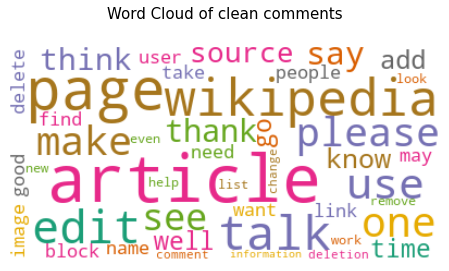

In [34]:
wc = WordCloud(max_font_size=60, min_font_size=10, max_words=100, background_color='white', 
               colormap='Dark2', collocations=False, random_state=10,)
fig = plt.figure(figsize=(8, 4))
text = ' '.join(train_df[train_df.num_tags == 0]['clean_text'])
wordcloud = wc.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of clean comments', fontsize=15, y=1.1)
plt.show()

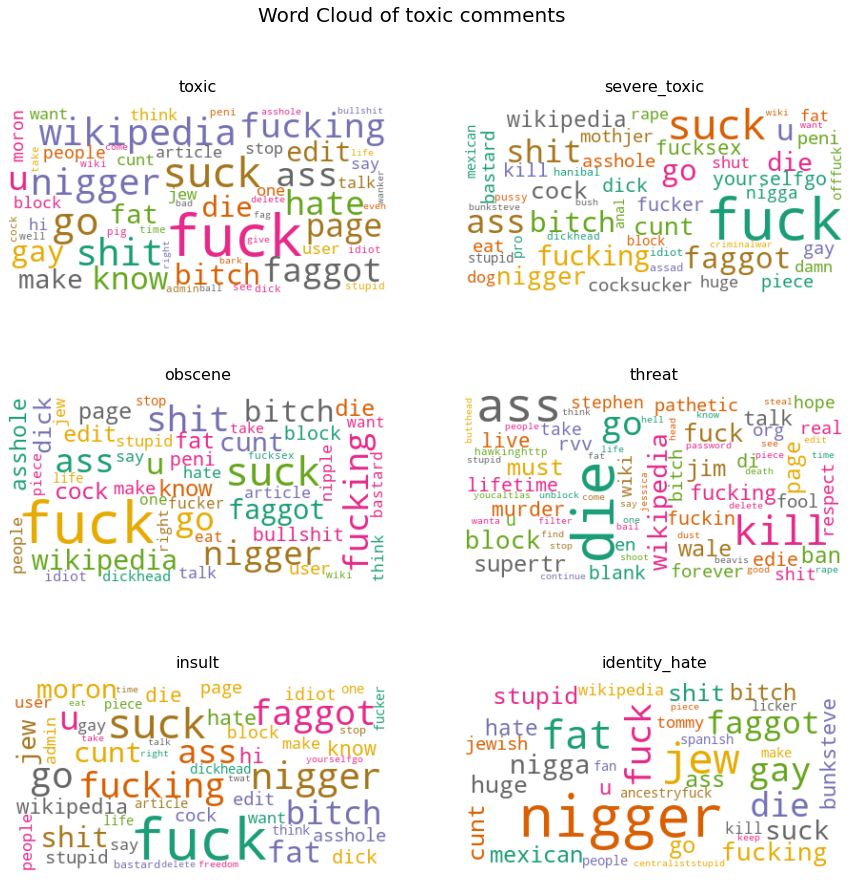

In [35]:
wc = WordCloud(max_font_size=60, min_font_size=10, max_words=100, background_color='white', 
               colormap='Dark2', repeat=False, random_state=10, contour_width=0.1,
               contour_color='black',mode='RGB', collocations=False)

fig = plt.figure(figsize=(15,15))
i = 1
for col in train_df.columns[2:8]:
    ax = fig.add_subplot(3, 2, i)
    text = ' '.join([t for t in train_df[train_df[col] != 0]['clean_text']])
    wordcloud = wc.generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.title(col, fontsize=16, y=1.05)
    plt.suptitle('Word Cloud of toxic comments', fontsize=20, y=0.95)
    i += 1

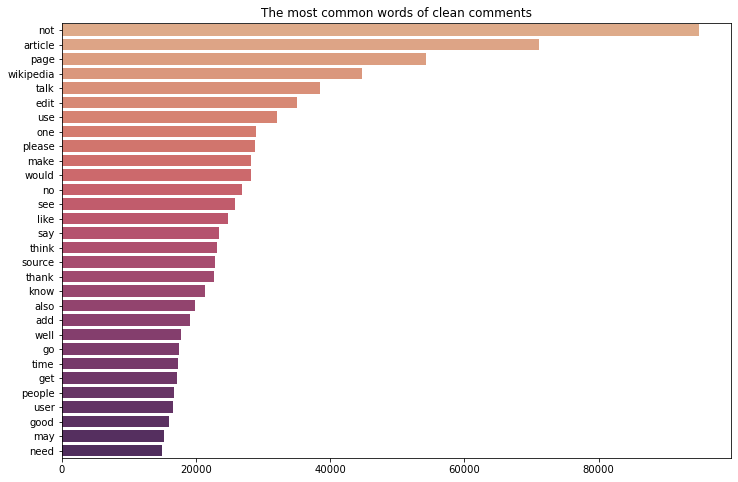

In [36]:
from collections import Counter

text = list(' '.join(train_df[train_df.num_tags == 0]['clean_text']).split())
counter = Counter(text)
most_common = counter.most_common()

x, y = [], []
for word, count in most_common[:30]:
    y.append(word)
    x.append(count)
    
plt.figure(figsize=(12,8))
bar = sns.barplot(x=x, y=y, palette='flare')
bar.set_title('The most common words of clean comments')
plt.show()

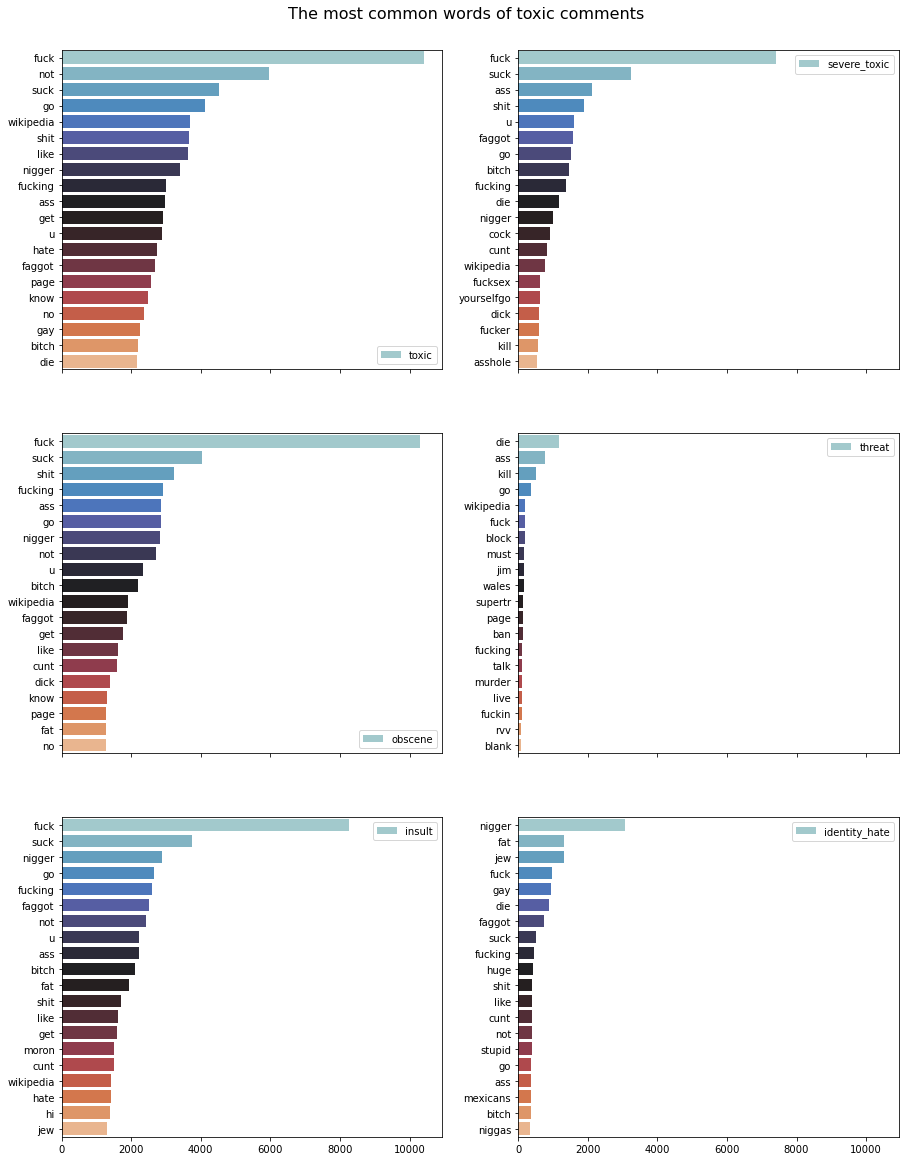

In [37]:
title = 'The most common words of toxic comments'
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(15,20))
fig.suptitle(title, fontsize=16, y=0.91)
row_num = 0
col_num = 0
i = 0
j = 0

for col in train_df.columns[2:8]:
    
    text = list(' '.join(train_df[train_df[col] != 0]['clean_text']).split())
    counter = Counter(text)
    most_common = counter.most_common()

    x, y = [], []
    for word, count in most_common[:20]:
        y.append(word)
        x.append(count)
        
    sns.barplot(x=x, y=y, ax=ax[row_num, col_num], label=col, palette='icefire')
    ax[row_num, col_num].legend()
    row_num = int((i+1)/2)
    col_num = (j+1)%2
    i += 1
    j += 1

## Feature Engineering

Feature engineering is a key part of Natural Language Processing (NLP). The process of transforming text to numerical features in order to be understandable for algorithms and machine is valled feature engineering. The most popular methods of feature engineering for texts are: Bag of Words model and TF-IDF.

### Bag of Words (BOW) Model

First, I combine all rows belong to a specific group and create a new dataframe.

In [38]:
dic = {}

for col in train_df.columns[2:8]:
    dic[col] = ' '.join([t for t in train_df[train_df[col] == 1]['clean_text']])

# pd.DataFrame.from_dict(dic).transpose()
comments_df = pd.DataFrame.from_dict([dic]).transpose()
comments_df.columns = ['clean_text']
comments_df

,clean_text
toxic,cocksucker pis around work hey talk exclusive group wp talibans good destroy self appoint purist gang one ask question abt anti social destructive...
severe_toxic,cocksucker pis around work stupid peace shit stop delete stuff asshole go die fall hole go hell stupid fuck mother cunt stink hi fucking bitch mot...
obscene,cocksucker pis around work gay antisemmitian archangel white tiger meow greetingshhh uh two way erase comment ww holocaust brutally slay jews not ...
threat,hi back last warning stop undo edit die think fagget get oife burn hell hate sorry not sex run conndom also sock puppet account suprise sincerely ...
insult,cocksucker pis around work gay antisemmitian archangel white tiger meow greetingshhh uh two way erase comment ww holocaust brutally slay jews not ...
identity_hate,gay antisemmitian archangel white tiger meow greetingshhh uh two way erase comment ww holocaust brutally slay jews not gay gypsys slavs anyone ant...


Now, I am creating a document-term matrix using CountVectorizer

In [39]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(comments_df.clean_text)
count_array = text_matrix.toarray()
counts_df = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names())
counts_df.index = comments_df.index
counts_df

,aa,aaa,aaaa,aaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany,aaaaaaaaaah,aaaannnnyyyywwwwhhhheeeerrrreeee,aaaawwww,aaaboyz,aaarrrgggh,...,zuma,zurich,zus,zyklon,zzteu,zzuuzz,zzzz,zzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
toxic,4,3,1,2,1,1,1,2,1,1,...,2,1,1,2,1,1,1,1,1,1
severe_toxic,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
obscene,2,2,0,0,0,1,1,0,0,0,...,0,1,0,2,0,0,0,0,1,0
threat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insult,3,2,0,0,0,1,0,0,0,0,...,0,1,0,2,0,0,0,1,1,0
identity_hate,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Let's see what are the most common words for each category. But, before doing that I pickle the comments and document-term matrix dataframes.

In [40]:
comments_df.to_pickle("comments_df.pkl")
counts_df.to_pickle("docmatrix_df.pkl")

In [41]:
counts_df = counts_df.transpose()
counts_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
aa,4,0,2,0,3,0
aaa,3,0,2,0,2,0
aaaa,1,0,0,0,0,0
aaaaa,2,0,0,0,0,0
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany,1,0,0,0,0,0


Let's find the top 3o words for each category.

In [42]:
top_dict = {}

for col in counts_df.columns:
    top = counts_df[col].sort_values(ascending=False).head(30)
    top_dict[col] = list(zip(top.index, top.values))

top_dict

{'toxic': [('fuck', 10410),
  ('not', 5961),
  ('suck', 4516),
  ('go', 4121),
  ('wikipedia', 3686),
  ('shit', 3655),
  ('like', 3641),
  ('nigger', 3404),
  ('fucking', 3013),
  ('ass', 2966),
  ('get', 2928),
  ('hate', 2741),
  ('faggot', 2686),
  ('page', 2578),
  ('know', 2491),
  ('no', 2354),
  ('gay', 2259),
  ('bitch', 2185),
  ('die', 2173),
  ('edit', 2091),
  ('make', 2010),
  ('fat', 1973),
  ('moron', 1932),
  ('people', 1929),
  ('block', 1883),
  ('article', 1865),
  ('say', 1775),
  ('talk', 1730),
  ('hi', 1691),
  ('user', 1657)],
 'severe_toxic': [('fuck', 7410),
  ('suck', 3256),
  ('ass', 2119),
  ('shit', 1890),
  ('faggot', 1574),
  ('go', 1526),
  ('bitch', 1459),
  ('fucking', 1383),
  ('die', 1165),
  ('nigger', 1016),
  ('cock', 914),
  ('cunt', 843),
  ('wikipedia', 774),
  ('fucksex', 624),
  ('yourselfgo', 621),
  ('dick', 607),
  ('fucker', 595),
  ('kill', 585),
  ('asshole', 540),
  ('eat', 537),
  ('cocksucker', 510),
  ('piece', 507),
  ('mothjer',

In [54]:
for cat, comments in top_dict.items():
    print(cat)
    print(', '.join([word for word,count in comments[0:20]]))
    print('----')

toxic
fuck, not, suck, go, wikipedia, shit, like, nigger, fucking, ass, get, hate, faggot, page, know, no, gay, bitch, die, edit
----
severe_toxic
fuck, suck, ass, shit, faggot, go, bitch, fucking, die, nigger, cock, cunt, wikipedia, fucksex, yourselfgo, dick, fucker, kill, asshole, eat
----
obscene
fuck, suck, shit, fucking, ass, go, nigger, not, bitch, wikipedia, faggot, get, like, cunt, dick, know, page, fat, no, cock
----
threat
die, ass, kill, go, wikipedia, fuck, block, must, jim, wales, supertr, page, ban, fucking, talk, murder, live, fuckin, rvv, blank
----
insult
fuck, suck, nigger, go, fucking, faggot, not, ass, bitch, fat, shit, like, get, moron, cunt, wikipedia, hate, hi, jew, know
----
identity_hate
nigger, fat, jew, fuck, gay, die, faggot, suck, fucking, huge, shit, like, cunt, stupid, not, go, ass, mexicans, bitch, niggas
----


I want to check how bigrams representation will change the results.

In [69]:
bivectorizer = CountVectorizer(ngram_range = (2,2))
bitext_matrix = bivectorizer.fit_transform(comments_df.clean_text)
bicount_array = bitext_matrix.toarray()
bicounts_df = pd.DataFrame(data=bicount_array, columns=bivectorizer.get_feature_names())
bicounts_df.index = comments_df.index
bicounts_df = bicounts_df.transpose()
bicounts_df
# bivectorizer.get_feature_names()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
aa ae,1,0,0,0,0,0
aa craze,1,0,1,0,1,0
aa ecw,0,0,0,0,1,0
aa ja,1,0,0,0,0,0
aa kar,1,0,1,0,1,0
...,...,...,...,...,...,...
zzuuzz neo,1,0,0,0,0,0
zzzz aftah,1,0,0,0,0,0
zzzzzzz real,1,0,0,0,1,0
zzzzzzzzzzzzzzzzz yawn,1,1,1,0,1,0


In [70]:
bi_top_dict = {}

for col in bicounts_df.columns:
    top = bicounts_df[col].sort_values(ascending=False).head(30)
    bi_top_dict[col] = list(zip(top.index, top.values))

bi_top_dict

{'toxic': [('fuck fuck', 2177),
  ('nigger nigger', 2011),
  ('hate hate', 1572),
  ('moron hi', 1475),
  ('hi moron', 1472),
  ('faggot faggot', 1380),
  ('pig pig', 1250),
  ('jew fat', 1234),
  ('fat jew', 1226),
  ('go fuck', 1158),
  ('shit shit', 1149),
  ('suck suck', 1139),
  ('ass ass', 1127),
  ('bark bark', 999),
  ('wanker wanker', 963),
  ('fuck go', 884),
  ('bullshit bullshit', 833),
  ('ball ball', 832),
  ('nipple nipple', 763),
  ('talk page', 743),
  ('suck cock', 717),
  ('fuck bitch', 688),
  ('bitch fuck', 681),
  ('suck dick', 672),
  ('die die', 641),
  ('die fag', 625),
  ('dickhead dickhead', 625),
  ('fag die', 624),
  ('fucksex fucksex', 623),
  ('yourselfgo fuck', 621)],
 'severe_toxic': [('fuck fuck', 2033),
  ('ass ass', 1126),
  ('suck suck', 1124),
  ('shit shit', 1000),
  ('go fuck', 930),
  ('fuck go', 844),
  ('faggot faggot', 714),
  ('bitch fuck', 672),
  ('fuck bitch', 670),
  ('die die', 632),
  ('fucksex fucksex', 623),
  ('fuck yourselfgo', 621

In [71]:
for cat, comments in bi_top_dict.items():
    print(cat)
    print(', '.join([word for word,count in comments[0:20]]))
    print('----')

toxic
fuck fuck, nigger nigger, hate hate, moron hi, hi moron, faggot faggot, pig pig, jew fat, fat jew, go fuck, shit shit, suck suck, ass ass, bark bark, wanker wanker, fuck go, bullshit bullshit, ball ball, nipple nipple, talk page
----
severe_toxic
fuck fuck, ass ass, suck suck, shit shit, go fuck, fuck go, faggot faggot, bitch fuck, fuck bitch, die die, fucksex fucksex, fuck yourselfgo, yourselfgo fuck, suck cock, mothjer fucker, fucker cocksucker, cocksucker mothjer, nigger nigger, eat shit, huge faggot
----
obscene
fuck fuck, nigger nigger, go fuck, shit shit, suck suck, ass ass, fuck go, bullshit bullshit, nipple nipple, suck cock, fuck bitch, bitch fuck, suck dick, die die, faggot faggot, dickhead dickhead, fucksex fucksex, yourselfgo fuck, fuck yourselfgo, jew fat
----
threat
ass ass, die die, must die, jim wales, wales must, die jim, kill kill, go kill, kill go, go murder, talk page, murder go, blank talk, di edie, die di, edie die, die wikipedia, wikipedia die, lifetime ban